# Import Required Libraries

In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.27.0 which is incompatible.



  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=5109ed2433f6dbd7651e03b1fb2fc82759d64ee49d68f59f4a4b30180381f99d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\77\6b\dc\722aee2a5d46a021ab67564c9d3d5536c3bd9577fcdc3a5aeb
Successfully built peewee


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Replace 'AAPL' with your desired stock symbol
symbol = 'AAPL'

# Define the date range (start and end dates)
start_date = '2020-01-01'
end_date = '2024-02-08'

In [4]:
# fetch historical stock data
stock_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Display the obtained data
print(stock_data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152649  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.441467  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.018692  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.675278  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.844360  132079200


In [6]:
# Display the obtained data
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441467,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018692,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1031 entries, 2020-01-02 to 2024-02-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1031 non-null   float64
 1   High       1031 non-null   float64
 2   Low        1031 non-null   float64
 3   Close      1031 non-null   float64
 4   Adj Close  1031 non-null   float64
 5   Volume     1031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 56.4 KB


In [8]:
stock_data['date'] = pd.to_datetime(stock_data.index)

In [9]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,2020-01-02
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441467,146322800,2020-01-03
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018692,118387200,2020-01-06
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,2020-01-07
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200,2020-01-08


In [17]:
import plotly.graph_objects as go

# create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=stock_data['date'],
                open=stock_data['Open'],
                high=stock_data['High'],
                low=stock_data['Low'],
                close=stock_data['Close'])])

# customize the chart layout
fig.update_layout(
    title='stock Price Chart AAPL',
    yaxis_title='Price ($)',
    xaxis_rangeslider_visible=False)

# Display the chart
fig.show()

In [18]:
# drop the date and volume column
stock_data.drop(['date', 'Volume'], axis=1, inplace=True)

In [19]:
stock_data.reset_index(drop=True, inplace=True)

In [20]:
stock_data.size

5155

In [21]:
stock_data.shape

(1031, 5)

<AxesSubplot:>

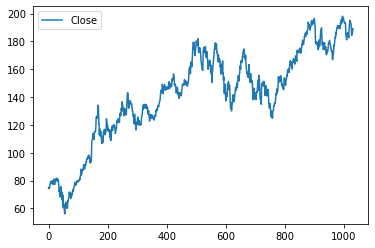

In [22]:
stock_data.plot(y="Close", use_index=True)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train and Test the Dataset

In [27]:
X = stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']]
y= stock_data['Close']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [28]:
# Make prediction on the testing set
y_predict = rf.predict(xtest)

In [37]:
# evaluating the model using the mean_squared_error
metrics = mean_squared_error(ytest, y_predict)
print("The metrics is: ", metrics)

The metrics is:  0.18400679051934252


In [41]:
# predict stock price for new data 
import numpy as np
new_data = np.array([[74, 73, 56, 75, 85]])

In [42]:
new_price_predicted = rf.predict(new_data)

In [48]:
print("The predicted price is: ", new_price_predicted[0])

The predicted price is:  76.04302402496337
